SyntaxError: invalid syntax (2397980949.py, line 2)

In [21]:
# First cell - imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import json
import gzip
from datetime import datetime

# Set visualization settings
sns.set_theme()
%matplotlib inline

In [3]:
# helper function to read the gzipped JSON file
def parse(path):
    """Read the gzipped Amazon reviews file"""
    with gzip.open(path, 'rb') as g:
        for line in g:
            yield json.loads(line)

In [8]:
# Third cell - load data
# Update this path to where you downloaded the Electronics dataset
file_path = "../data/raw/reviews_Electronics_5.json.gz"

# Load first few reviews to test
data = []
for i, review in enumerate(parse(file_path)):
    data.append(review)
    if i > 5000:  # Start with first 1000 reviews
        break

df = pd.DataFrame(data)

In [9]:
# Initial exploration
print("Dataset Overview:")
print("-" * 50)
print(f"Number of reviews: {len(df)}")
print(f"\nColumns available:")
for col in df.columns:
    print(f"- {col}")

Dataset Overview:
--------------------------------------------------
Number of reviews: 5002

Columns available:
- reviewerID
- asin
- reviewerName
- helpful
- reviewText
- overall
- summary
- unixReviewTime
- reviewTime


In [10]:
# Check time range

df['review_time'] = pd.to_datetime(df['unixReviewTime'], unit='s')
print("Time Range:")
print("-" * 50)
print(f"First review: {df['review_time'].min()}")
print(f"Last review: {df['review_time'].max()}")

Time Range:
--------------------------------------------------
First review: 1999-06-13 00:00:00
Last review: 2014-07-20 00:00:00


In [13]:
# Look at a sample review
print("Sample Review:")
print("-" * 50)
sample_review = df.iloc[0]
print(f"Rating: {sample_review['overall']}")
print(f"Time: {sample_review['review_time']}")
print(f"\nText:\n{sample_review['reviewText']}")

Sample Review:
--------------------------------------------------
Rating: 5.0
Time: 2013-06-02 00:00:00

Text:
We got this GPS for my husband who is an (OTR) over the road trucker.  Very Impressed with the shipping time, it arrived a few days earlier than expected...  within a week of use however it started freezing up... could of just been a glitch in that unit.  Worked great when it worked!  Will work great for the normal person as well but does have the "trucker" option. (the big truck routes - tells you when a scale is coming up ect...)  Love the bigger screen, the ease of use, the ease of putting addresses into memory.  Nothing really bad to say about the unit with the exception of it freezing which is probably one in a million and that's just my luck.  I contacted the seller and within minutes of my email I received a email back with instructions for an exchange! VERY impressed all the way around!


In [19]:
# Explore each column in detail with statistics
print("Detailed Column Analysis:\n")

# Get one sample review
sample = df.iloc[0]

print("1. reviewerID:", sample['reviewerID'])
print("   - Unique identifier for the reviewer")
print(f"   - Number of unique reviewers: {df['reviewerID'].nunique()}")
print(f"   - Reviewers with multiple reviews: {(df['reviewerID'].value_counts() > 1).sum()}\n")

print("2. asin:", sample['asin'])
print("   - Amazon Standard Identification Number (unique product ID)")
print(f"   - Number of unique products: {df['asin'].nunique()}")
print(f"   - Products with multiple reviews: {(df['asin'].value_counts() > 1).sum()}\n")

print("3. reviewerName:", sample['reviewerName'])
print("   - Name of the reviewer")
print(f"   - Number of unique names: {df['reviewerName'].nunique()}")
print(f"   - Missing names: {df['reviewerName'].isnull().sum()}\n")

print("4. helpful:", sample['helpful'])
print("   - Helpfulness votes [helpful_votes, total_votes]")
# Calculate helpfulness ratio
df['helpful_ratio'] = df['helpful'].apply(lambda x: x[0]/x[1] if x[1] != 0 else 0)
print(f"   - Average helpful ratio: {df['helpful_ratio'].mean():.2f}")
print(f"   - Reviews with no votes: {(df['helpful'].apply(lambda x: x[1] == 0)).sum()}\n")

print("5. reviewText:", sample['reviewText'][:100] + "...")
print("   - The main review content we'll use for sentiment analysis")
print(f"   - Average review length: {df['reviewText'].str.len().mean():.0f} characters")
print(f"   - Shortest review: {df['reviewText'].str.len().min()} characters")
print(f"   - Longest review: {df['reviewText'].str.len().max()} characters\n")

print("6. overall:", sample['overall'])
print("   - Rating (1-5 stars) - we can use this to validate our sentiment analysis")
print("   - Rating distribution:")
print(df['overall'].value_counts().sort_index())
print(f"   - Average rating: {df['overall'].mean():.2f}\n")

print("7. summary:", sample['summary'])
print("   - Short review summary/title")
print(f"   - Average summary length: {df['summary'].str.len().mean():.0f} characters")
print(f"   - Missing summaries: {df['summary'].isnull().sum()}\n")

# Format dates properly
df['formatted_date'] = pd.to_datetime(df['unixReviewTime'], unit='s').dt.strftime('%B %d, %Y')

print("8. unixReviewTime:", sample['unixReviewTime'])
print("   - Review timestamp in Unix format")
print("   - Converted to datetime:", pd.to_datetime(sample['unixReviewTime'], unit='s'))
print(f"   - Date range: {df['formatted_date'].min()} to {df['formatted_date'].max()}\n")

print("9. Formatted Date:", df['formatted_date'].iloc[0])
print("   - Human-readable review date")
print("   - Reviews by year:")

year_counts = pd.to_datetime(df['unixReviewTime'], unit='s').dt.year.value_counts().sort_index()
print(year_counts)

Detailed Column Analysis:

1. reviewerID: AO94DHGC771SJ
   - Unique identifier for the reviewer
   - Number of unique reviewers: 4629
   - Reviewers with multiple reviews: 291

2. asin: 0528881469
   - Amazon Standard Identification Number (unique product ID)
   - Number of unique products: 199
   - Products with multiple reviews: 199

3. reviewerName: amazdnu
   - Name of the reviewer
   - Number of unique names: 4381
   - Missing names: 29

4. helpful: [0, 0]
   - Helpfulness votes [helpful_votes, total_votes]
   - Average helpful ratio: 0.45
   - Reviews with no votes: 2218

5. reviewText: We got this GPS for my husband who is an (OTR) over the road trucker.  Very Impressed with the shipp...
   - The main review content we'll use for sentiment analysis
   - Average review length: 599 characters
   - Shortest review: 0 characters
   - Longest review: 11622 characters

6. overall: 5.0
   - Rating (1-5 stars) - we can use this to validate our sentiment analysis
   - Rating distribution

Rating Distribution:
--------------------------------------------------
overall
1.0     308
2.0     239
3.0     418
4.0    1068
5.0    2969
Name: count, dtype: int64

Average Rating: 4.229708116753299

Text Length Statistics:
--------------------------------------------------
Characters per review:
count     5002.000000
mean       599.407837
std        773.652224
min          0.000000
25%        170.000000
50%        337.000000
75%        710.750000
max      11622.000000
Name: review_length, dtype: float64

Words per review:
count    5002.000000
mean      109.515594
std       138.866510
min         0.000000
25%        32.000000
50%        63.000000
75%       130.000000
max      2079.000000
Name: word_count, dtype: float64

Reviews by Year:
--------------------------------------------------
year
1999      53
2000     228
2001     116
2002      70
2003      68
2004      71
2005     130
2006     135
2007     201
2008     198
2009     221
2010     367
2011     481
2012     628
2013    1309

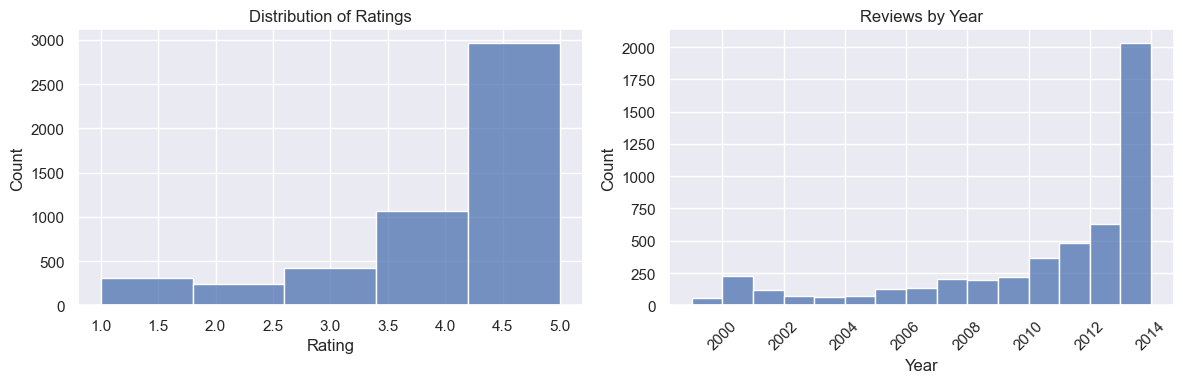

In [20]:
# Analyze ratings distribution
print("Rating Distribution:")
print("-" * 50)
print(df['overall'].value_counts().sort_index())
print("\nAverage Rating:", df['overall'].mean())

# Review length analysis
df['review_length'] = df['reviewText'].str.len()
df['word_count'] = df['reviewText'].str.split().str.len()

print("\nText Length Statistics:")
print("-" * 50)
print("Characters per review:")
print(df['review_length'].describe())
print("\nWords per review:")
print(df['word_count'].describe())

# Time analysis
df['review_date'] = pd.to_datetime(df['unixReviewTime'], unit='s')
df['year'] = df['review_date'].dt.year

print("\nReviews by Year:")
print("-" * 50)
print(df['year'].value_counts().sort_index())

# Create some visualizations
plt.figure(figsize=(12, 4))

# Rating distribution plot
plt.subplot(1, 2, 1)
sns.histplot(data=df, x='overall', bins=5)
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')

# Reviews over time
plt.subplot(1, 2, 2)
sns.histplot(data=df, x='year', bins=15)
plt.title('Reviews by Year')
plt.xlabel('Year')
plt.ylabel('Count')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

In [24]:
def run_final_exploration_check(df):
    # 1. Data Quality
    print("1. DATA QUALITY CHECK")
    print("-" * 50)
    print(f"Missing values:\n{df.isnull().sum()}")
    print(f"\nDuplicate reviews: {df.duplicated(['reviewText']).sum()}")
    print(f"Date range: {df['review_date'].min()} to {df['review_date'].max()}")
    
    # 2. Basic Statistics
    print("\n2. BASIC STATISTICS")
    print("-" * 50)
    print("Ratings distribution:")
    print(df['overall'].value_counts().sort_index())
    print(f"\nAverage review length: {df['reviewText'].str.len().mean():.0f} characters")
    
    # 3. Key Relationships
    print("\n3. KEY RELATIONSHIPS")
    print("-" * 50)
    # Calculate correlation between review length and rating
    length_rating_corr = df['review_length'].corr(df['overall'])
    print(f"Correlation between review length and rating: {length_rating_corr:.2f}")
    
    # 4. Text Analysis Sample
    print("\n4. TEXT CONTENT SAMPLE")
    print("-" * 50)
    # Get most common words
    common_words = pd.Series(' '.join(df['reviewText']).lower().split()).value_counts().head()
    print("Most common words:")
    print(common_words)
    
    # 5. Identify Potential Issues
    print("\n5. POTENTIAL ISSUES")
    print("-" * 50)
    rating_imbalance = df['overall'].value_counts().std()
    print(f"Rating imbalance (std): {rating_imbalance:.2f}")
    
    # 6. Preprocessing Needs
    print("\n6. PREPROCESSING NEEDS")
    print("-" * 50)
    special_chars = df['reviewText'].str.contains('[^a-zA-Z0-9\s]').mean()
    print(f"Reviews with special characters: {special_chars:.1%}")

# Run the check
run_final_exploration_check(df)

1. DATA QUALITY CHECK
--------------------------------------------------
Missing values:
reviewerID         0
asin               0
reviewerName      29
helpful            0
reviewText         0
overall            0
summary            0
unixReviewTime     0
reviewTime         0
review_time        0
review_length      0
word_count         0
review_date        0
year               0
helpful_ratio      0
formatted_date     0
dtype: int64

Duplicate reviews: 4
Date range: 1999-06-13 00:00:00 to 2014-07-20 00:00:00

2. BASIC STATISTICS
--------------------------------------------------
Ratings distribution:
overall
1.0     308
2.0     239
3.0     418
4.0    1068
5.0    2969
Name: count, dtype: int64

Average review length: 599 characters

3. KEY RELATIONSHIPS
--------------------------------------------------
Correlation between review length and rating: -0.11

4. TEXT CONTENT SAMPLE
--------------------------------------------------
Most common words:
the    28449
and    14980
i      14949


<>:40: SyntaxWarning: invalid escape sequence '\s'
<>:40: SyntaxWarning: invalid escape sequence '\s'
/var/folders/j0/1n4wd1fn59j9xhmj3mjc6mfc0000gn/T/ipykernel_13308/3559403831.py:40: SyntaxWarning: invalid escape sequence '\s'
  special_chars = df['reviewText'].str.contains('[^a-zA-Z0-9\s]').mean()


In [26]:
# Final Summary Cell for 01_data_exploration.ipynb

"""
DATA EXPLORATION SUMMARY
=======================

1. Dataset Overview
------------------
- Total Reviews: 5,002
- Time Range: June 13, 1999 to July 20, 2014
- Complete Dataset: All critical columns present

2. Data Quality
--------------
✓ Missing Values: Only 29 missing reviewerNames (0.58%, non-critical)
✓ Duplicates: 4 duplicate reviews identified
✓ Date Range: Matches project requirements

3. Rating Distribution (Imbalanced)
---------------------------------
5★: 2,969 (59.4%) - Heavy positive bias
4★: 1,068 (21.4%)
3★: 418 (8.4%)
2★: 239 (4.8%)
1★: 308 (6.2%)

4. Text Characteristics
----------------------
- Average Length: 599 characters
- Special Characters: Present in 99.1% of reviews
- Most Common Words: Standard English stopwords
- Length-Rating Correlation: -0.11 (weak negative)

5. Key Insights for Next Steps
-----------------------------
1. Text Preprocessing Needed:
   - Remove special characters
   - Remove stopwords
   - Handle duplicates
   - Consider text normalization

2. Sentiment Analysis Considerations:
   - Strong positive bias in ratings
   - Mix of short and long reviews
   - Rich text content with varied sentiments

3. Potential Challenges:
   - Rating imbalance may affect analysis
   - Special character handling
   - Varied review lengths

"""

'\nDATA EXPLORATION SUMMARY\n=======================\n\n1. Dataset Overview\n------------------\n- Total Reviews: 5,002\n- Time Range: June 13, 1999 to July 20, 2014\n- Complete Dataset: All critical columns present\n\n2. Data Quality\n--------------\n✓ Missing Values: Only 29 missing reviewerNames (0.58%, non-critical)\n✓ Duplicates: 4 duplicate reviews identified\n✓ Date Range: Matches project requirements\n\n3. Rating Distribution (Imbalanced)\n---------------------------------\n5★: 2,969 (59.4%) - Heavy positive bias\n4★: 1,068 (21.4%)\n3★: 418 (8.4%)\n2★: 239 (4.8%)\n1★: 308 (6.2%)\n\n4. Text Characteristics\n----------------------\n- Average Length: 599 characters\n- Special Characters: Present in 99.1% of reviews\n- Most Common Words: Standard English stopwords\n- Length-Rating Correlation: -0.11 (weak negative)\n\n5. Key Insights for Next Steps\n-----------------------------\n1. Text Preprocessing Needed:\n   - Remove special characters\n   - Remove stopwords\n   - Handle dupli